In [1]:
cd ..

/home/mars/src_aiai


In [2]:
import pickle
import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from src.visualisation import compare, print_statistics, plot_statistics
from skimage.metrics import structural_similarity, peak_signal_noise_ratio, mean_squared_error

In [5]:
data = "COCO"
ISNR = 30

In [7]:
name_net_post = [
    ("Adjoint", "adjoint", "_sigmoid"),
#     ("Learned Adjoint", "adjoint", "_sigmoid_learned_adjoint"),

#     ("U-net", "unet", "_sigmoid"),
#     ("U-net learned adjoint", "unet", "_sigmoid_learned_adjoint"),
    
#     ("dU-net", "dunet", "_sigmoid"),
#     ("dU-net learned adjoint", "dunet", "_sigmoid_learned_adjoint"),
#     ("dU-net learned grad", "dunet", "_sigmoid_learned_grad"),
#     ("dU-net grad upsample", "dunet", "_sigmoid_upsample_grad"),
#     ("U-net long", "unet", "_sigmoid_long"),
#     ("dU-net dirty", "dunet", "_sigmoid_upsample_grad_dirty"),
    
   ("U-net", "unet", "_sigmoid_same"),
    ("GU-net", "dunet", "_sigmoid_same"),
    ("HL-net sigmoid", "highlow", "_sigmoid_2"),
    ("HL-net linear", "highlow", "_linear_2"),
    ("HL-net deep", "highlow", "_linear_deep"),
    ("HL-net ramp", "highlow", "_linear_ramp")
#     ("GU-net sigmoid 2", "dunet", "_sigmoid_same2"),
#     ("GU-net linear 2", "dunet", "_linear_same2"),
#     ("U-net small", "unet", "_sigmoid_small"),
#     ("dU-net small", "dunet", "_sigmoid_small"),
#     ("U-net smaller", "unet", "_sigmoid_smaller"),
#     ("dU-net smaller", "dunet", "_sigmoid_smaller"),
    
#     ("Adjoint", "adjoint", "_sigmoid"),

#     ("U-net", "unet", "_linear_report"),
#     ("GU-net", "dunet", "_linear_report"),
]

In [8]:
results = []
results += [(name, "Train", f"./data/processed/{data}/train_predict_{net}_{ISNR}dB{post}.npy") for name, net, post in name_net_post]
results += [(name, "Test", f"./data/processed/{data}/test_predict_{net}_{ISNR}dB{post}.npy") for name, net, post in name_net_post]
results += [("Primal Dual", mode, f"./data/processed/{data}/PD_{mode.lower()}_predict_{ISNR}dB.npy") for  mode in ["Train", "Test"]]
# results += [("Primal Dual", mode, f"./data/processed/{data}/PD_{mode.lower()}_predict_{ISNR}dB.npy") for  mode in ["Train"]]


metrics = [
    ("PSNR", peak_signal_noise_ratio),
    ("SSIM", structural_similarity),
    ("MSE", mean_squared_error)
]
names = set([i[0] for i in results])

In [8]:
statistics = pd.read_csv(f"./results/{data}/statistics.csv")
with pd.option_context('mode.use_inf_as_na', True):
    statistics.dropna(inplace=True)

In [9]:
print(set(statistics.Method))

{'Primal Dual', 'Adjoint', 'HL-net ramp', 'GU-net', 'HL-net linear', 'HL-net sigmoid', 'U-net', 'HL-net deep'}


In [10]:
# statistics = statistics[statistics.Set == "Train"]
# from src.visualisation import results_and_metrics
# name_net_post, results, metrics = results_and_metrics("COCO", 30)
# results = [ results[0], results[2], results[4], results[-1]]

In [11]:
statistics = statistics[[ statistics.Method.iloc[i] in names  for i in range(len(statistics))] ]

In [12]:
sns.set_style("whitegrid")
statistics.Method[statistics.Method == "Adjoint"] = "Pseudo-inverse"

Name                                    |PSNR                |SSIM                |MSE                 |
GU-net_Test                             |  20.257 \pm   2.888|   0.689 \pm   0.121|   0.011 \pm   0.007|
GU-net_Train                            |  20.336 \pm   3.122|   0.694 \pm   0.122|   0.011 \pm   0.006|
HL-net deep_Test                        |  17.423 \pm   2.169|   0.575 \pm   0.114|   0.020 \pm   0.010|
HL-net deep_Train                       |  17.328 \pm   2.152|   0.575 \pm   0.120|   0.021 \pm   0.010|
HL-net linear_Test                      |  16.258 \pm   1.787|   0.549 \pm   0.107|   0.026 \pm   0.011|
HL-net linear_Train                     |  16.255 \pm   1.763|   0.551 \pm   0.114|   0.026 \pm   0.010|
HL-net ramp_Test                        |  17.470 \pm   2.090|   0.582 \pm   0.107|   0.020 \pm   0.009|
HL-net ramp_Train                       |  17.407 \pm   2.026|   0.583 \pm   0.112|   0.020 \pm   0.009|
HL-net sigmoid_Test                     |  18.160 \pm  

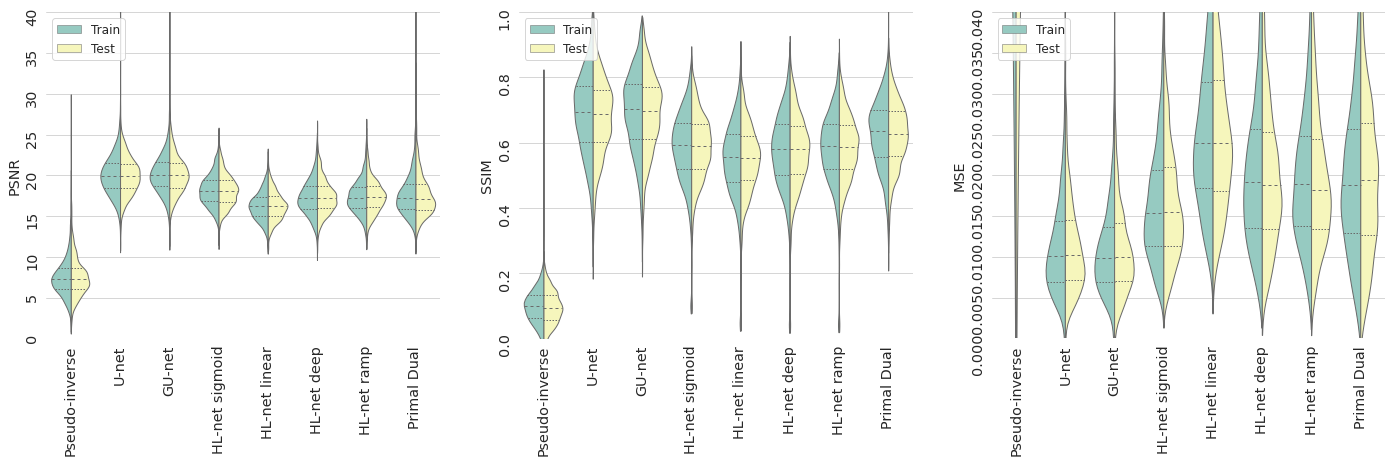

In [13]:
print_statistics(statistics, results, metrics, latex=False)
plot_statistics(statistics, metrics)#, order=["Pseudo-inverse", "Primal Dual", "U-net", "GU-net"])

In [14]:
examples = pickle.load(open(f"./results/{data}/examples.pkl", "rb"))

In [15]:
train_ims = []
test_ims = []
train_titles = []
test_titles = []

for name, mode, im in examples:
    if mode == "Train":
        train_ims.append(im)
        train_titles.append(name)
    else:
        test_ims.append(im)
        test_titles.append(name)

In [16]:
set(statistics.Method)

{'GU-net',
 'HL-net deep',
 'HL-net linear',
 'HL-net ramp',
 'HL-net sigmoid',
 'Primal Dual',
 'Pseudo-inverse',
 'U-net'}

In [17]:
train_titles[1] = "Pseudo-inverse"

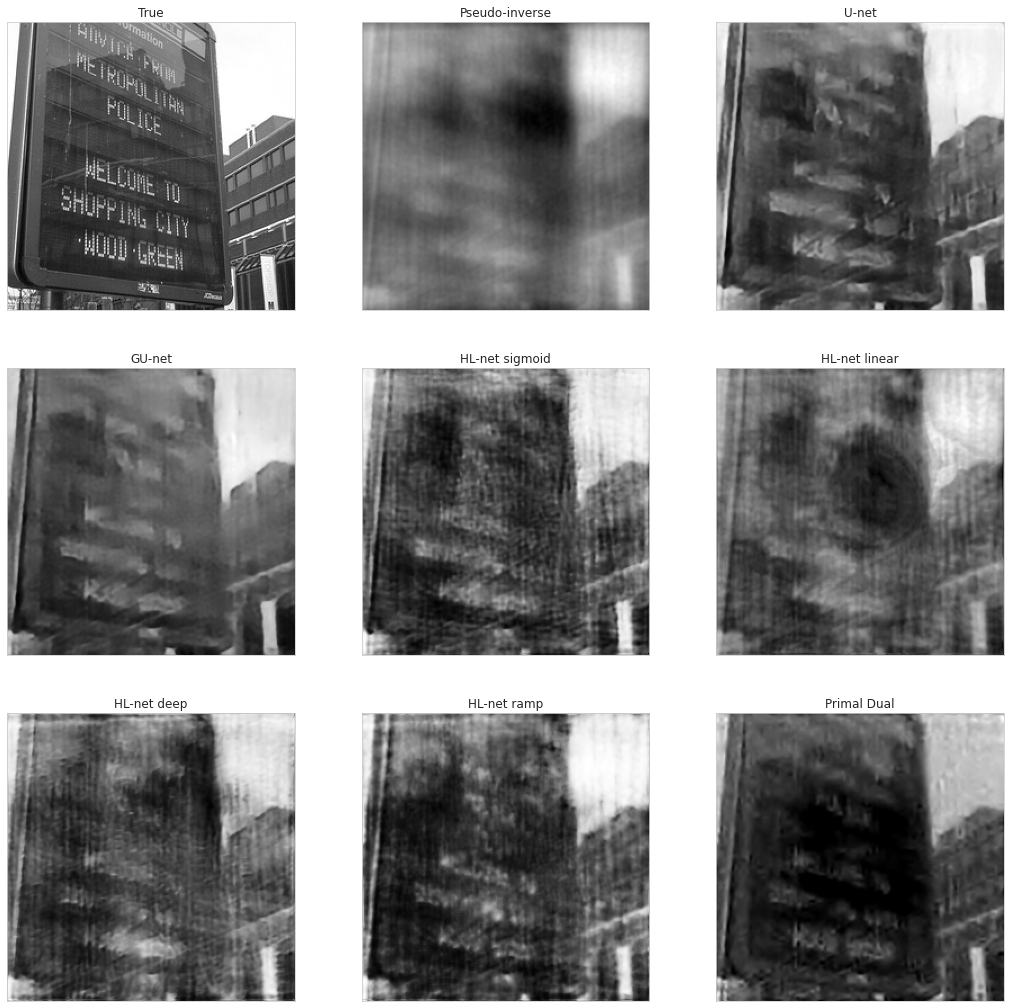

In [18]:
i=0
compare([ims[i] for ims in test_ims], ncols=3, nrows=3, titles=train_titles, same_scale=False, cmap='gray')

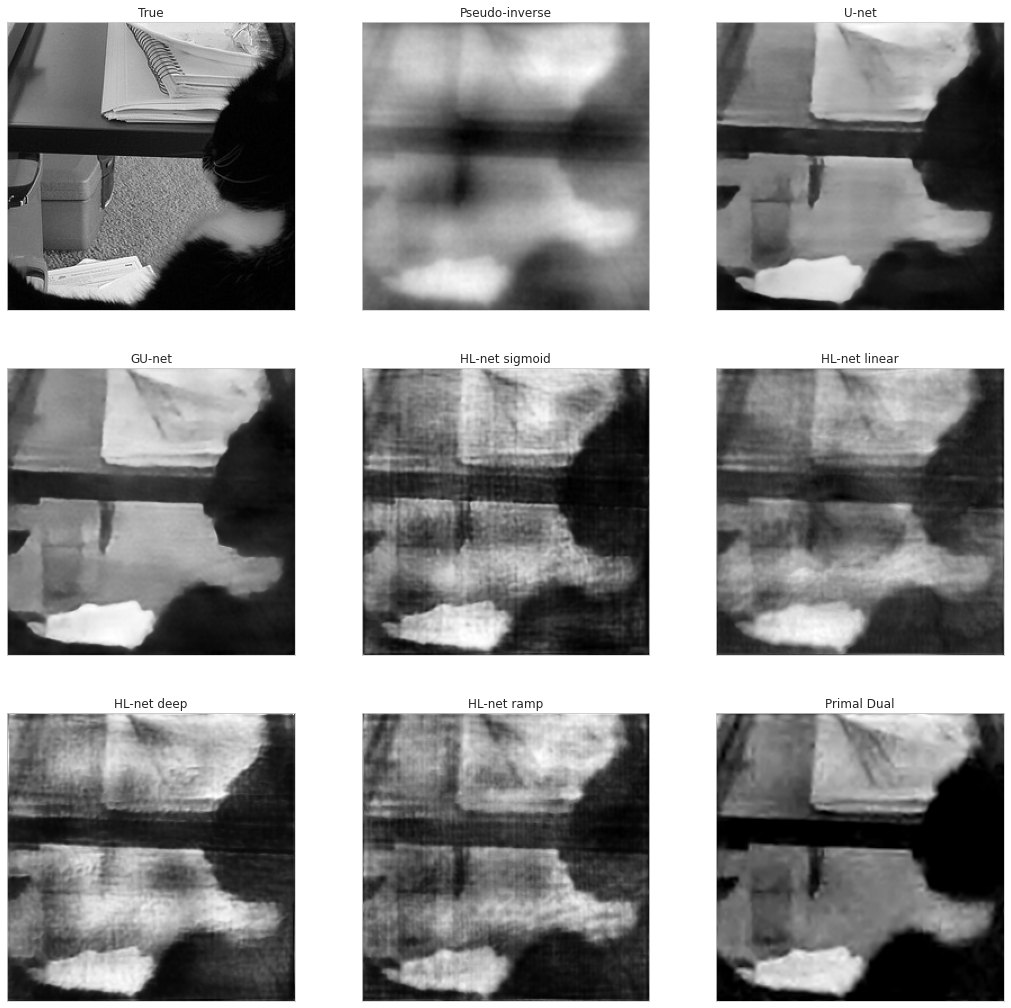

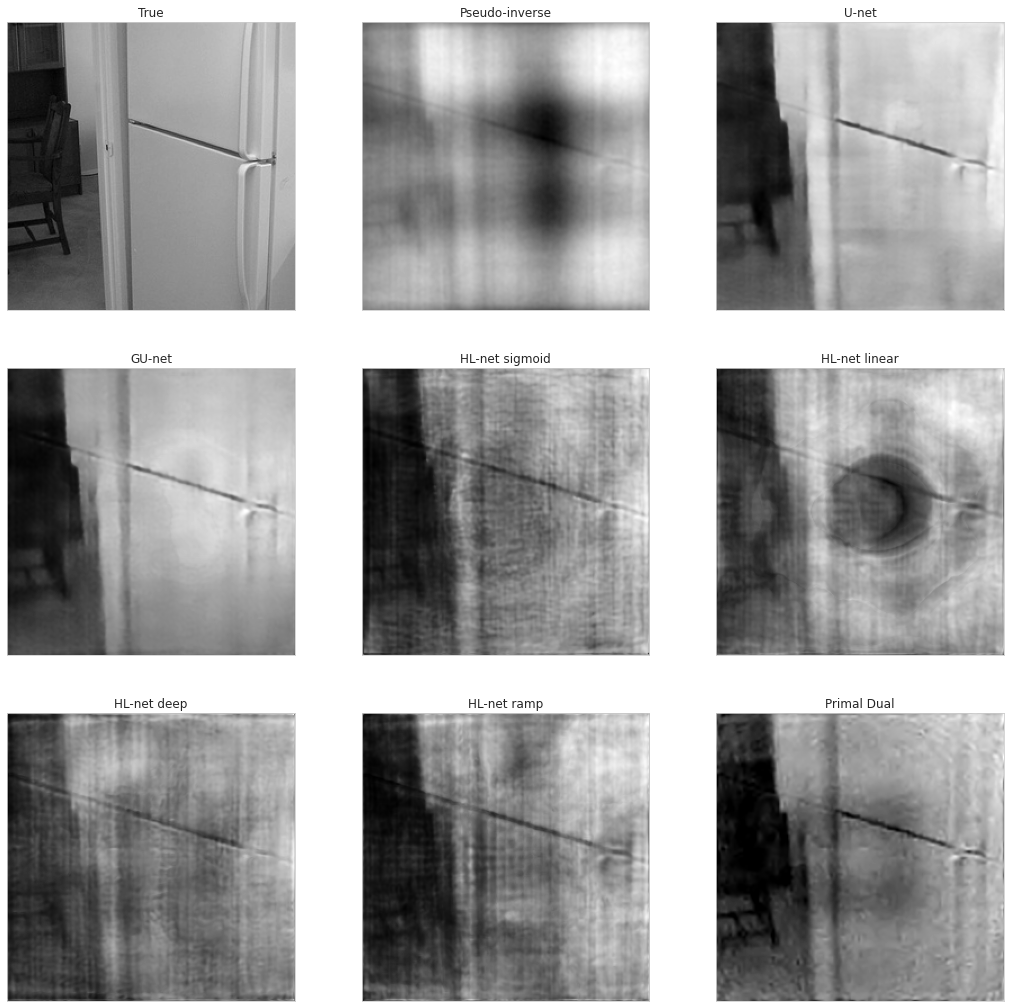

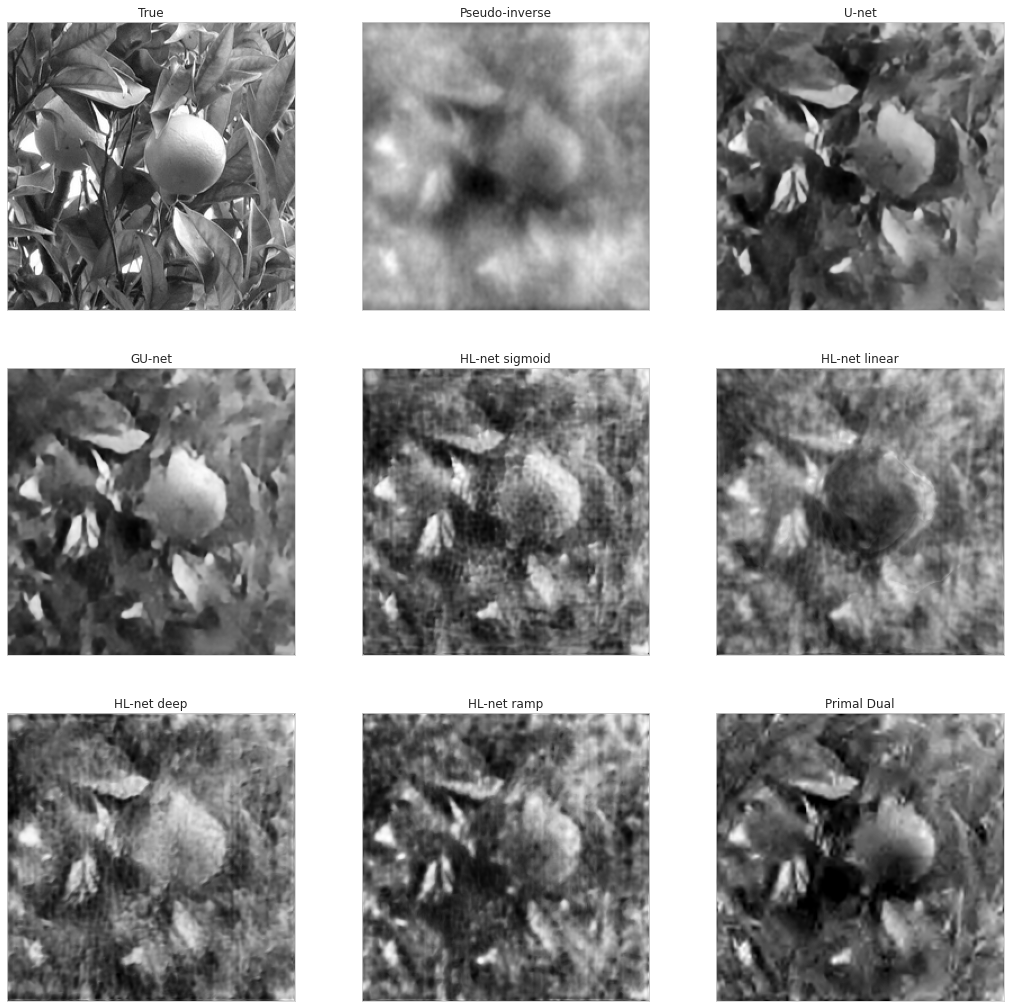

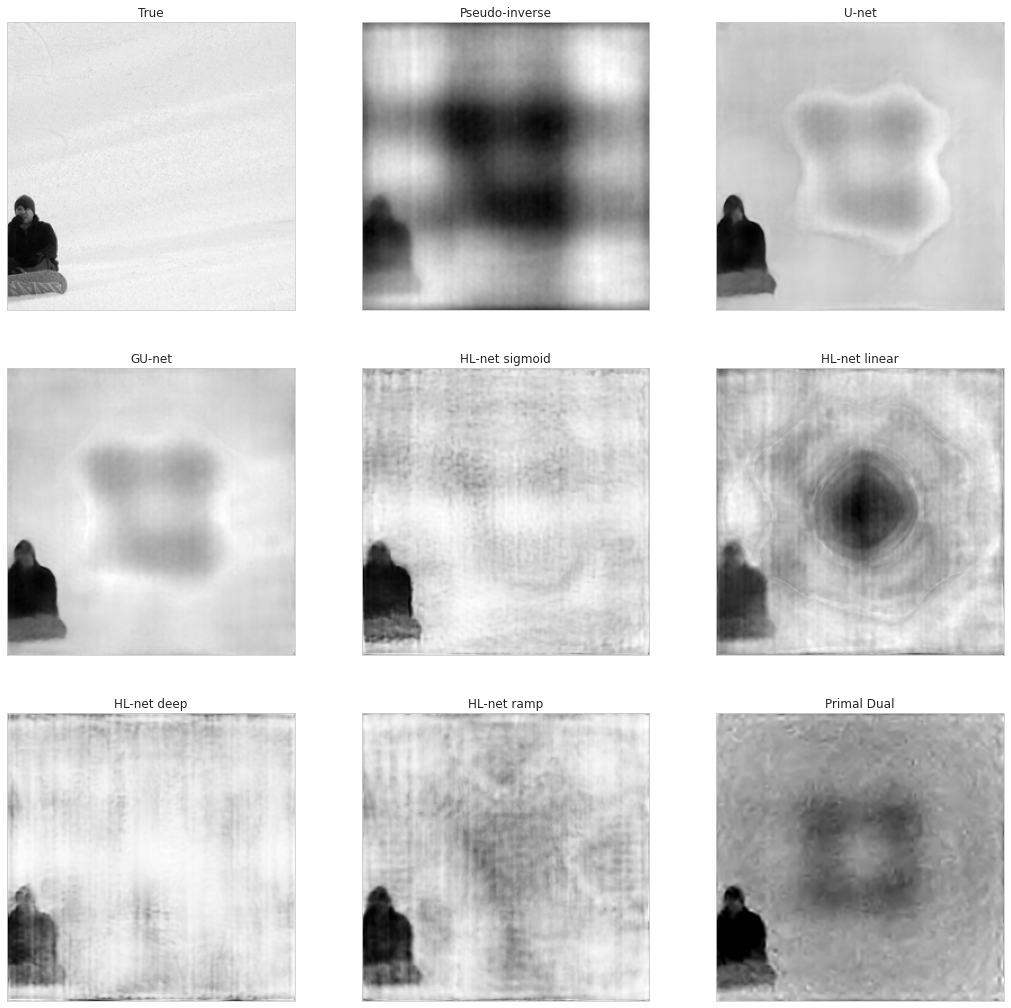

In [19]:
for i in range(1,5):
    compare([ims[i] for ims in test_ims], ncols=3, nrows=3, titles=train_titles, same_scale=False, cmap='gray')
#     print(i)

In [20]:
statistics_robustness = pd.read_csv("COCO_statistics_robustness.csv")
with pd.option_context('mode.use_inf_as_na', True):
    statistics_robustness.dropna(inplace=True)

In [ ]:
# robustness data
name_net_post = [
    ("Adjoint", "adjoint", "_sigmoid"),
#     ("Learned Adjoint", "adjoint", "_sigmoid_learned_adjoint"),

#     ("U-net", "unet", "_sigmoid"),
#     ("U-net learned adjoint", "unet", "_sigmoid_learned_adjoint"),
    
#     ("dU-net", "dunet", "_sigmoid"),
#     ("dU-net learned adjoint", "dunet", "_sigmoid_learned_adjoint"),
#     ("dU-net learned grad", "dunet", "_sigmoid_learned_grad"),
#     ("dU-net grad upsample", "dunet", "_sigmoid_upsample_grad"),
#     ("U-net long", "unet", "_sigmoid_long"),
#     ("dU-net dirty", "dunet", "_sigmoid_upsample_grad_dirty"),
    
   ("U-net", "unet", ""),
#     ("GU-net", "dunet", "_sigmoid_same"),
#     ("HL-net sigmoid", "highlow", "_sigmoid_2"),
#     ("HL-net linear", "highlow", "_linear_2"),
#     ("HL-net deep", "highlow", "_linear_deep"),
#     ("HL-net ramp", "highlow", "_linear_ramp")
#     ("GU-net sigmoid 2", "dunet", "_sigmoid_same2"),
#     ("GU-net linear 2", "dunet", "_linear_same2"),
#     ("U-net small", "unet", "_sigmoid_small"),
#     ("dU-net small", "dunet", "_sigmoid_small"),
#     ("U-net smaller", "unet", "_sigmoid_smaller"),
#     ("dU-net smaller", "dunet", "_sigmoid_smaller"),
    
#     ("Adjoint", "adjoint", "_sigmoid"),

#     ("U-net", "unet", "_linear_report"),
#     ("GU-net", "dunet", "_linear_report"),
]


operator = "NUFFT_SPIDER"
results = []
results += [(name, "Test", f"./data/processed/{data}/{operator}/test_predict_{net}_robustness{post}.npy") for name, net, post in name_net_post]

statistics = pd.DataFrame(columns=["PSNR", "SSIM", "MSE", "method", "set"])#{}

sigmas = np.repeat(np.arange(30,10,-2.5), 200)
x_test = np.load(f"./data/intermediate/x_true_test_robustness.npy")

for j in  tqdm.tqdm(range(len(results))):
# for j in tqdm.tqdm(range(1)):
    name, dset, pred_path = results[j]


    try:
        pred = np.squeeze( np.load(pred_path) )
        df = pd.DataFrame()
        for metric, f in metrics:
            x = x_test
            df[metric] = [f(x[i], pred[i]) for i in range(len(x))]
            df['Method'] = name
            df['Noise'] = sigmas
            if statistics.empty:
                statistics = df
            else:
                statistics = statistics.append(df, ignore_index=False)
#         examples.append((name, dset, pred[0]))
    except:
        pass


print("saving results")
# with pd.option_context('mode.use_inf_as_na', True):
#     statistics.dropna(inplace=True)

# pickle.dump(examples, open("examples_robustness.pkl", "wb"))
statistics.to_csv(f"{data}_statistics_robustness.csv")


In [21]:
set(statistics_robustness.Method)

{'Adjoint',
 'GU-net',
 'HL-net deep',
 'HL-net linear',
 'HL-net ramp',
 'HL-net sigmoid',
 'U-net'}

Text(0, 0.5, 'reconstruction SSIM')

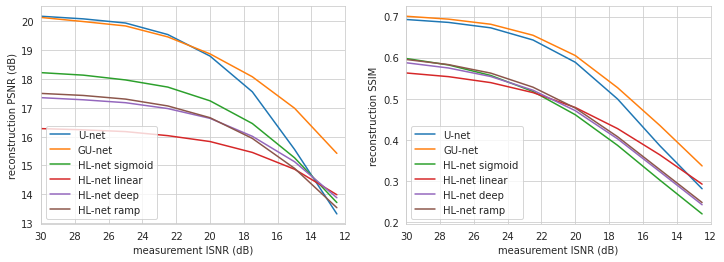

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))

# plt.figure(figsize=(12,8))
i = 0
for name, mode, _ in results:
#     print(name, mode)
    if mode == "Test":
        if True:
            sub = statistics_robustness[ statistics_robustness["Method"] ==  name].groupby("Noise").mean()
            std = statistics_robustness[ statistics_robustness["Method"] ==  name].groupby("Noise").std()
            
            if len(sub > 0) and name != 'Adjoint':
                ax[0].plot(np.arange(12.5, 32.5, 2.5), sub['PSNR'].values, color=f"C{i}", label = name)
#                 ax[0].fill_between(np.arange(12.5, 32.5, 2.5), sub['PSNR'].values-std['PSNR'].values, sub['PSNR'].values+std['PSNR'].values, color=f"C{i}", alpha=.3)

                ax[1].plot(np.arange(12.5, 32.5, 2.5), sub['SSIM'].values, color=f"C{i}", label = name)
#                 ax[1].fill_between(np.arange(12.5, 32.5, 2.5), sub['SSIM'].values-std['SSIM'].values, sub['SSIM'].values+std['SSIM'].values, color=f"C{i}", alpha=.3)
                i+= 1
                
#                 ax2 = ax[0].twiny()
#                 ax2.axis(xmin=fs.max(), xmax=fs.min())
#                 ax2.set_xticks(fs[::-1])
ax[0].axis(xmin=30, xmax=12)
ax[1].axis(xmin=30, xmax=12)
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("measurement ISNR (dB)")
ax[0].set_ylabel("reconstruction PSNR (dB)")
ax[1].set_xlabel("measurement ISNR (dB)")
ax[1].set_ylabel("reconstruction SSIM")

Text(0, 0.5, 'reconstruction SSIM ')

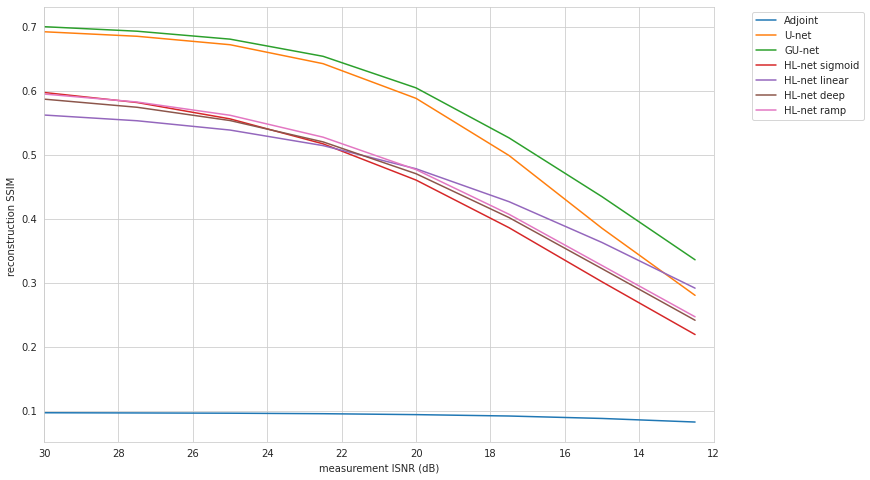

In [23]:
plt.figure(figsize=(12,8))
for name, mode, _ in results:
#     print(name, mode)
    if mode == "Train":
        sub = statistics_robustness[ statistics_robustness["Method"] ==  name].groupby("Noise").mean()
        if len(sub > 0):
            plt.plot(np.arange(12.5, 32.5, 2.5), sub['SSIM'].values, label = name)

plt.axis( xmin=30, xmax=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("measurement ISNR (dB)")
plt.ylabel("reconstruction SSIM ")